# 1.0 Solutions: Single Qubit Operations

In this notebook we'll explore some properties of single qubit operations
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np

/Users/jacquescarolan/anaconda2/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


### 1.1 Pauli X
- Initialise a single quantum bit and classical register
- confirm the properties of the X operation `x(q[0])`, what happens when you put $\ket{0}$ through, and when you put $\ket{1}$ through?

{'0': 1024}


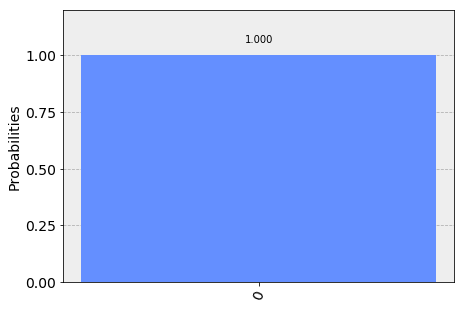

In [5]:
# Initliaise quantum and classical register
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

# apply the X operation
qc.y(q[0])


# apply the measurement
qc.measure(q, c)


# Set the initial state (either |0> or |1>)
opts = {"initial_statevector": np.array([0,1])} # input the qubit |0>
# opts = {"initial_statevector": np.array([0,1])} # input the qubit |1>

# Load backend QasmSimulator and run the job
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024, backend_options=opts)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)
print(counts)

# plot histogram
plot_histogram(counts)

### 1.2 Hadamard
Lets look at the properties of the Hadamard gate `h(q[0])`.  What happens when you put $\ket{0}$ in, then $\ket{1}$ in?

{'1': 518, '0': 506}


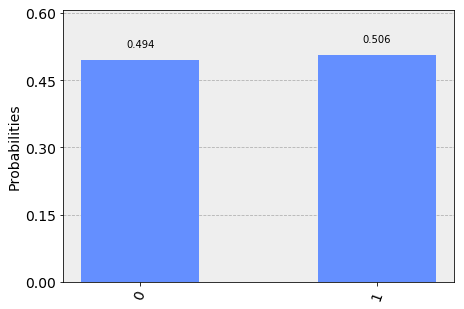

In [7]:
# Initliaise quantum and classical register
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

# apply the h operation
qc.h(q[0])


# apply the measurement
qc.measure(q, c)


# Set the initial state (either |0> or |1>)
opts = {"initial_statevector": np.array([0,1])} # input the qubit |0>
# opts = {"initial_statevector": np.array([0,1])} # input the qubit |1>

# Load backend QasmSimulator and run the job
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024, backend_options=opts)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)
print(counts)

# plot histogram
plot_histogram(counts)

Eeek! The quanutm statistics are the same.  Lets try putting in different states to see whats going on:
$$\ket{+}=(\ket{0}+\ket{1})/\sqrt{2}$$
$$\ket{-}=(\ket{0}-\ket{1})/\sqrt{2}$$

{'1': 1024}


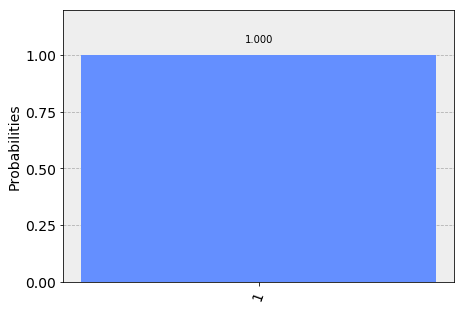

In [9]:
# Set the initial state (either |+> or |->)
opts = {"initial_statevector": np.array([1,-1])/np.sqrt(2)} # input the qubit |0>
# opts = {"initial_statevector": np.array([0,1])} # input the qubit |1>

# Load backend QasmSimulator and run the job
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024, backend_options=opts)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)
print(counts)

# plot
plot_histogram(counts)

So you can figure out what the gate is doing by inputting different states, and making measurments.  You've just done *quanutm tomography*!